In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d dhaksana/catvsdog

Dataset URL: https://www.kaggle.com/datasets/dhaksana/catvsdog
License(s): apache-2.0
 91% 379M/418M [00:00<00:00, 537MB/s]
100% 418M/418M [00:00<00:00, 538MB/s]


In [5]:
!unzip catvsdog.zip -d CatvsDog


Streaming output truncated to the last 5000 lines.
  inflating: CatvsDog/CatvsDog/train/dog/2507.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2509.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2510.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2511.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2514.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2515.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2518.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2520.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2521.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2523.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2525.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2527.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2529.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2532.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2533.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2537.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2539.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2541.jpg  
  inflating: 

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.applications.vgg16 import VGG16

In [8]:
conv_base=VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [10]:

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,813,377 (64.14 MB)

 Trainable params: 9,177,601 (35.01 MB)

 Non-trainable params: 7,635,776 (29.13 MB)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [13]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/CatvsDog/CatvsDog/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/CatvsDog/CatvsDog/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 17526 images belonging to 2 classes.
Found 2290 images belonging to 2 classes.


In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 153s 279ms/step - accuracy: 0.8470 - loss: 0.3635 - val_accuracy: 0.9096 - val_loss: 0.2754
Epoch 2/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 132s 241ms/step - accuracy: 0.9267 - loss: 0.1893 - val_accuracy: 0.9210 - val_loss: 0.2111
Epoch 3/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 132s 241ms/step - accuracy: 0.9341 - loss: 0.1614 - val_accuracy: 0.9205 - val_loss: 0.2214
Epoch 4/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 135s 246ms/step - accuracy: 0.9435 - loss: 0.1409 - val_accuracy: 0.8498 - val_loss: 0.4503
Epoch 5/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 137s 250ms/step - accuracy: 0.9506 - loss: 0.1263 - val_accuracy: 0.9406 - val_loss: 0.1825
Epoch 6/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 141s 258ms/step - accuracy: 0.9582 - loss: 0.1106 - val_accuracy: 0.9266 - val_loss: 0.2058
Epoch 7/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 139s 254ms/step - accuracy: 0.9611 - loss: 0.1021 - val_accuracy: 0.8965 - val_loss: 0.2621
Epoch 8/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 133s 242ms/step - accuracy: 0.9636 -

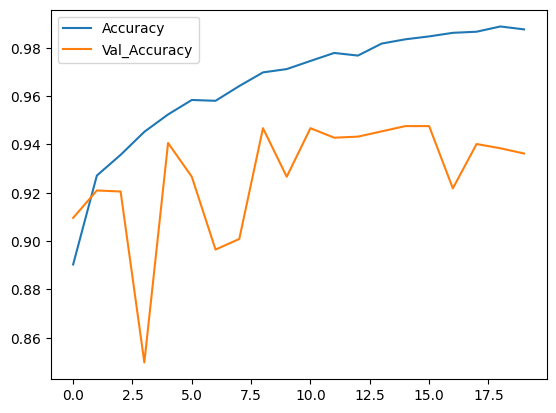

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')

plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


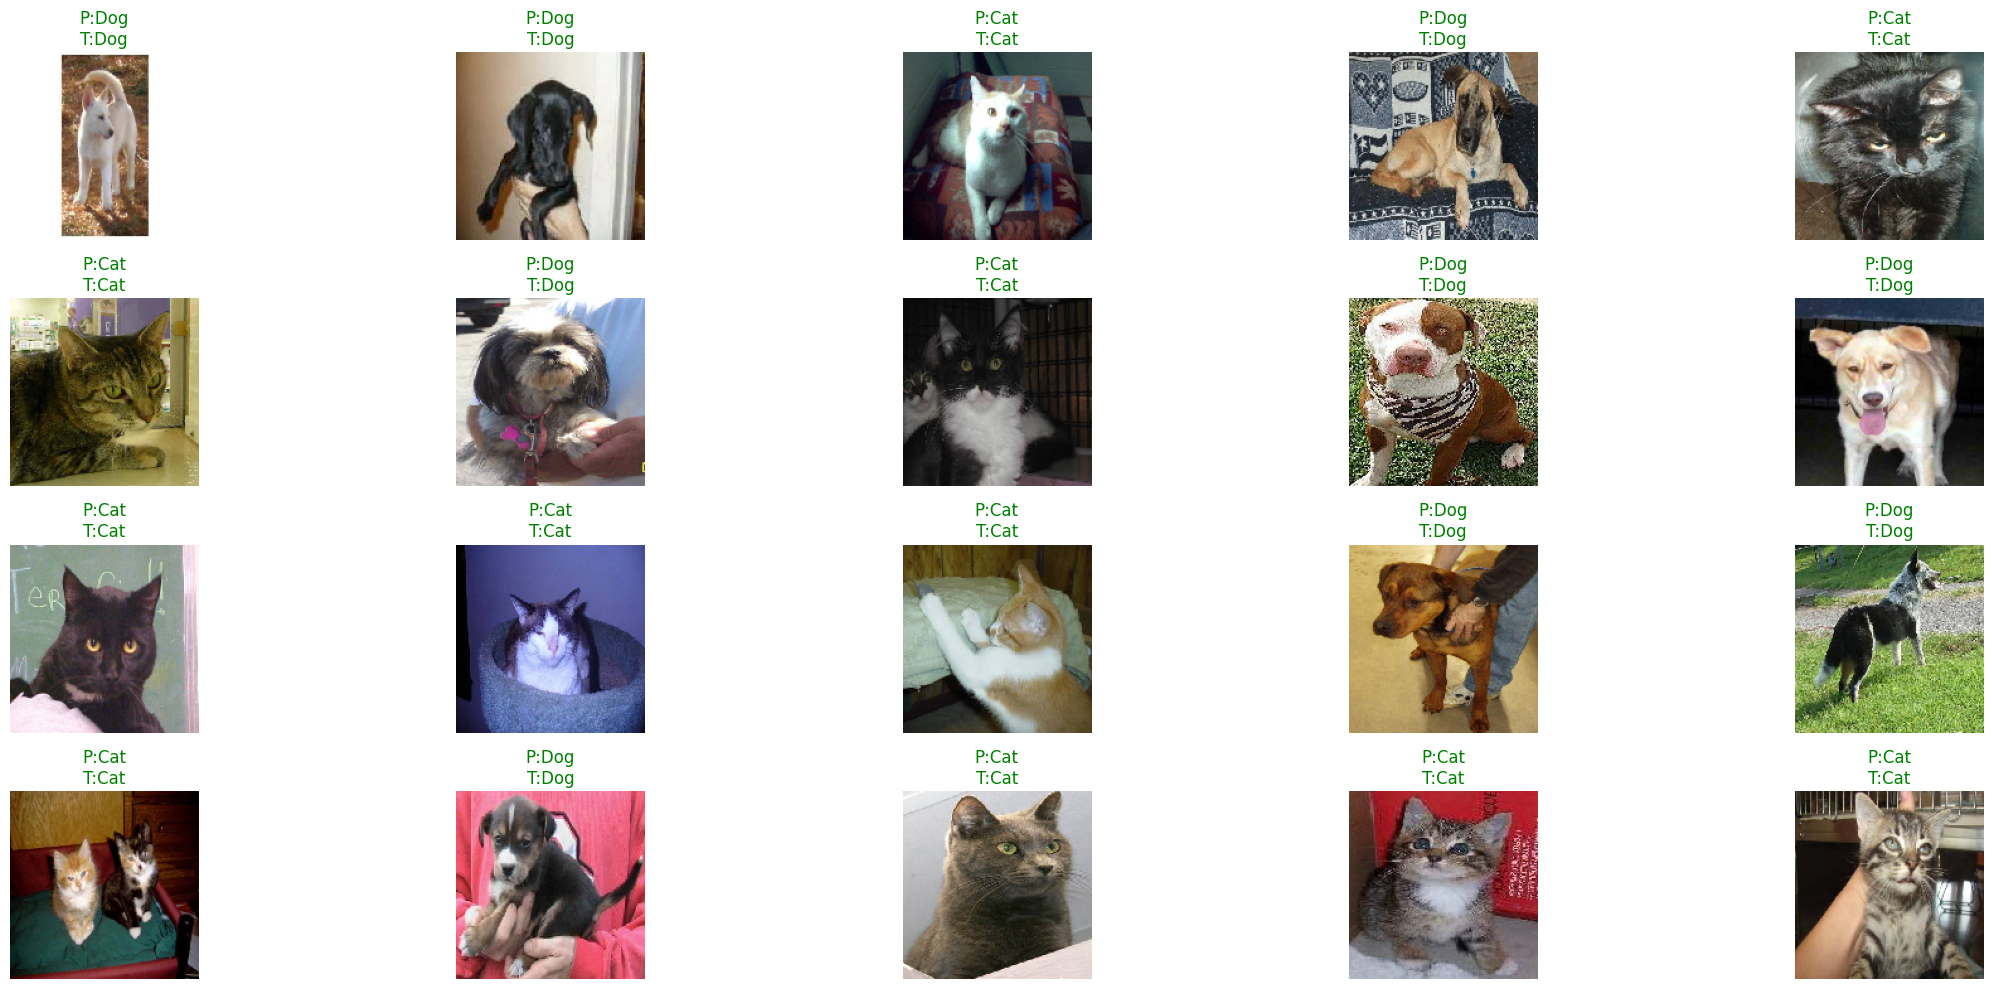

In [22]:
# Get one batch from the validation generator
x_batch, y_batch = next(validation_generator)

# Predict
predictions = model.predict(x_batch)
predicted_classes = (predictions > 0.5).astype("int32")

# Set number of images to display
num_images = 20  # adjust as you like (<= batch_size)
rows, cols = 4, 5
plt.figure(figsize=(24, 10))

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')

    pred_label = "Dog" if predicted_classes[i] == 1 else "Cat"
    true_label = "Dog" if y_batch[i] == 1 else "Cat"
    color = "green" if pred_label == true_label else "red"

    plt.title(f"P:{pred_label}\nT:{true_label}", color=color, fontsize=12)

plt.tight_layout()
plt.show()

#conclusion
>The accuracy of the model on the training data after 20 epochs is approximately 98.82%, and the accuracy on the validation data is approximately 93.62%.